# Entorno de trabajo: Crear un dataset de noticias de prensa a partir del motor de búsqueda Sophia

Este notebook muestra una manera de extraer noticias desde el motor de búsqueda de _Sophia_, a partir de una **palabra clave**, un **país** y un **periodo de tiempo**.


_Sophia_ es un proyecto I+i+D desarrollado en la Universidad Austral de Chile desde 2019. El motor de búsqueda se encuentra en fase de mejoramiento continuo. Por cualquier pregunta o problema técnica con este notebook, no dudar en contactarme por Discord (@MatthieuVernier) o por correo mvernier@inf.uach.cl.

## 0. Librerías útiles

- Elasticsearch es el motor de búsqueda utilizado por Sophia
- Requiere la instalación del paquete elasticsearch

In [1]:
!python -V

Python 3.9.12


In [2]:
!pip install elasticsearch

In [4]:
import elasticsearch
from datetime import datetime

In [5]:
elasticsearch.__version__

(7, 17, 0)

## 1. Parámetros de la búsqueda

Características del motor de búsqueda:  
- El formato de las fechas es: YYYY-MM-DD
- El motor de búsqueda incluye noticias por distintos paises, pero se recomienda utilizar "chile" por el momento.
- El motor de búsqueda incluye datos entre el año 2000 y el año 2021.

In [6]:
country="chile"
from_="2021-09-16"
to_="2021-09-23"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

#keyword=""
simple_keyword=False

## 2. Parámetros de conexión al motor de búsqueda de Sophia

In [7]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"

In [8]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

## 3. Búsqueda de noticias de prensa

- Preparación de la consulta en el formato solicitado por Elasticsearch

In [9]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 
      #"must": [
      #  {match: { "text":keyword}}

      #],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

- Envio de la consulta
- No se puede devolver más de 10.000 noticias. En caso de obtener 10.000 respuestas, se recomienda buscar en un periodo de tiempo más corto o modificar la consulta.

In [10]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 1502 noticias encontradas...


# d

In [21]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date}
    
    df = df.append(new_row, ignore_index=True)

df

C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Lo

C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Lo

C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Lo

C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Lo

C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\3725804544.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\Spun\AppData\Lo

,id_news,country,media_outlet,url,title,text,date
0,21888180.0,chile,radiosago,https://www.radiosago.cl/comienza-celebracion-...,Comienza celebración dieciochera de la “Fiesta...,Un recorrido por los locales en el Parque La ...,2021-09-18
1,21888220.0,chile,radiosago,https://www.radiosago.cl/incautan-drogas-armas...,"Incautan drogas, armas blancas y celulares en ...",Exhaustiva revisión de encomiendas y allanami...,2021-09-17
2,21912925.0,chile,radiosago,https://www.radiosago.cl/postularan-a-la-carre...,Postularán a la Carretera Austral desde Puerto...,El Programa Territorial Integrado Ruta de los...,2021-09-21
3,21912928.0,chile,radiosago,https://www.radiosago.cl/senador-quinteros-lle...,Senador Quinteros lleva conflicto del Institut...,La comisión de Educación del Senado determinó...,2021-09-22
4,21912942.0,chile,radiosago,https://www.radiosago.cl/preocupacion-en-hospi...,Preocupación en Hospital de Ancud por Cámara H...,Ello porque existe la posibilidad que la Cámar...,2021-09-16
...,...,...,...,...,...,...,...
1497,47526891.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Anticipan claves del mercado laboral en el últ...,Las últimas cifras de empleo en Chile son alen...,2021-09-21
1498,47526892.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,Experta enseñó a diferenciar ganglios malignos...,Más de 1.400 casos de Linfoma no Hodgkin se di...,2021-09-21
1499,47526893.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,"""A mis 42 años siento que encontré la madurez....","Justo antes de la pandemia, Benjamín Vicuña vi...",2021-09-21
1500,47526894.0,chile,laestrelladechiloe,https://www.laestrellachiloe.cl/impresa/2021/0...,"Young Cister:""Me veo en un festival cantando c...","Con 24 años, Esteban Cisterna, mejor conocido ...",2021-09-21


In [22]:
df.head(5)

,id_news,country,media_outlet,url,title,text,date
0,21888180.0,chile,radiosago,https://www.radiosago.cl/comienza-celebracion-...,Comienza celebración dieciochera de la “Fiesta...,Un recorrido por los locales en el Parque La ...,2021-09-18
1,21888220.0,chile,radiosago,https://www.radiosago.cl/incautan-drogas-armas...,"Incautan drogas, armas blancas y celulares en ...",Exhaustiva revisión de encomiendas y allanami...,2021-09-17
2,21912925.0,chile,radiosago,https://www.radiosago.cl/postularan-a-la-carre...,Postularán a la Carretera Austral desde Puerto...,El Programa Territorial Integrado Ruta de los...,2021-09-21
3,21912928.0,chile,radiosago,https://www.radiosago.cl/senador-quinteros-lle...,Senador Quinteros lleva conflicto del Institut...,La comisión de Educación del Senado determinó...,2021-09-22
4,21912942.0,chile,radiosago,https://www.radiosago.cl/preocupacion-en-hospi...,Preocupación en Hospital de Ancud por Cámara H...,Ello porque existe la posibilidad que la Cámar...,2021-09-16


# Analisis de topico

In [30]:
!python -m spacy download es_core_news_sm

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [31]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

C:\Users\Spun\miniconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [32]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Spun\miniconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [33]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [34]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [38]:
noticias = df.text.values.tolist()

In [39]:
noticias[0]

' Un recorrido por los locales en el Parque La Paloma realizó el alcalde Gervoy Paredes en el inicio de la Fiesta de la Chilenidad, que arrancó este viernes y se extiende hasta este sábado y domingo, en el retorno de los espectáculos masivos en la capital regional, respetando los aforos para actividades de este tipo, de acuerdo al Plan Paso a Paso del Ministerio de Salud. Junto a los concejales Fernando España y Luis Vargas y del diputado Alejandro Bernales, pudieron ver la labor de los fonderos en dejar todos sus puestos disponibles para la atención del público, como del personal municipal para que todo quede en orden. Durante la visita, el alcalde Gervoy Paredes señaló que “esperamos que la comunidad disfrute de este evento, asista en familia y de manera responsable en la celebración de estas Fiestas Patrias, disfrutar con moderación y estar respetando las distintas indicaciones”. Respecto a algunas dudas en el tema sanitario, el director de Salud Municipal, Miguel Aravena comentó qu

In [40]:
text_to_list(noticias[0])

['recorrido',
 'locales',
 'alcalde',
 'inicio',
 'viernes',
 'sábado',
 'domingo',
 'retorno',
 'espectáculos',
 'capital',
 'aforos',
 'actividades',
 'tipo',
 'acuerdo',
 'concejales',
 'diputado',
 'labor',
 'fonderos',
 'puestos',
 'atención',
 'público',
 'personal',
 'orden',
 'visita',
 'alcalde',
 'comunidad',
 'evento',
 'asista',
 'familia',
 'manera',
 'celebración',
 'moderación',
 'indicaciones',
 'Respecto',
 'dudas',
 'tema',
 'director',
 'personas',
 'años',
 'carnet',
 'vacunación',
 'diferencia',
 'personas',
 'años',
 'edad',
 'padre',
 'madre',
 'tutor',
 'respecto',
 'calendario',
 'vacunación',
 'niños',
 'jóvenes',
 'evento',
 'fin',
 'semana',
 'horario',
 'horas',
 'música',
 'vivo',
 'horas',
 'gastronomía',
 'juegos',
 'actividades',
 'directora',
 'cabo',
 'fiesta',
 'inconvenientes',
 'aforos',
 'personas',
 'sector',
 'público',
 'problemas',
 'ciudadanía',
 'medidas',
 'cédula',
 'identidad',
 'ingreso',
 'controles',
 'temperatura',
 'disposiciones',
 

In [41]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [42]:
noticias_procesadas[6]

['años',
 'anuncio',
 'inicio',
 'construcción',
 'obras',
 'centro',
 'reinserción',
 'jóvenes',
 'conflicto',
 'justicia',
 'avance',
 'entrega',
 'parte',
 'visita',
 'terreno',
 'delegado',
 'directora',
 'profesionales',
 'dirección',
 'arquitectura',
 'recorrido',
 'obra',
 'avance',
 'infraestructura',
 'dignidad',
 'jóvenes',
 'infractores',
 'ley',
 'respecto',
 'año',
 'oportunidad',
 'inserción',
 'jóvenes',
 'deuda',
 'sociedad',
 'directora',
 'cambio',
 'término',
 'estándares',
 'infraestructura',
 'trabajo',
 'reinserción',
 'adolescentes',
 'reinserción',
 'inversión',
 'millones',
 'pesos',
 'recursos',
 'capacidad',
 'jóvenes',
 'equipos',
 'interior',
 'escuela',
 'talleres',
 'formación',
 'unidad',
 'intervención',
 'consumo',
 'alcohol',
 'drogas',
 'dependencias',
 'infraestructura',
 'momentos',
 'proceso',
 'separación',
 'octubre',
 'año',
 'servicio',
 'área',
 'protección',
 'derechos',
 'tiempo',
 'paso',
 'procesos',
 'intervención',
 'adolescentes',
 'Ca

# LDA

In [44]:
#Crear Diccionario
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [49]:
len(id2word)

19410

In [51]:
id2word[0]

'Alejandro Bernales'

In [52]:
id2word[1]

'Desarrollo Comunitario'

In [55]:
texts = noticias_procesadas

In [59]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# View
print(dataset[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 2), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 3), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [61]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [79]:
lda_model.save('./Documents')

In [80]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.006*"equipo" + 0.006*"partido" + 0.006*"puntos" + 0.005*"minutos" + '
  '0.005*"años" + 0.005*"fecha" + 0.004*"parte" + 0.004*"partidos" + '
  '0.004*"horas" + 0.004*"lugar" + 0.003*"tiempo" + 0.003*"duelo" + '
  '0.003*"jugador" + 0.003*"juego" + 0.003*"puesto" + 0.003*"manera" + '
  '0.003*"\'" + 0.003*"encuentro" + 0.003*"víctima" + 0.003*"final" + '
  '0.003*"semana" + 0.002*"país" + 0.002*"cuenta" + 0.002*"punto" + '
  '0.002*"trabajo" + 0.002*"ataque" + 0.002*"vez" + 0.002*"caso" + '
  '0.002*"número" + 0.002*"triunfo" + 0.002*"jugadores" + 0.002*"serie" + '
  '0.002*"resultado" + 0.002*"club" + 0.002*"lesiones" + 0.002*"joven" + '
  '0.002*"momento" + 0.002*"hora" + 0.002*"domingo" + 0.002*"sentencia" + '
  '0.002*"prueba" + 0.002*"antecedentes" + 0.002*"mujer" + 0.002*"cancha" + '
  '0.002*"cuerpo" + 0.002*"hecho" + 0.002*"victoria" + 0.002*"grupo" + '
  '0.002*"local" + 0.002*"días" + 0.002*"casa" + 0.002*"temporada" + '
  '0.002*"gol" + 0.002*"cosas" + 0.002*"invest

In [81]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

C:\Users\Spun\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.088352  0.055482       1        1  23.875945
3      0.077119 -0.092093       2        1  21.386469
1      0.095601 -0.144902       3        1  20.828016
0      0.037640  0.208928       4        1  17.687377
4     -0.298711 -0.027414       5        1  16.222193, topic_info=          Term        Freq       Total Category  logprob  loglift
81      música  731.000000  731.000000  Default  30.0000  30.0000
635      casos  511.000000  511.000000  Default  29.0000  29.0000
4191     banda  273.000000  273.000000  Default  28.0000  28.0000
192      serie  336.000000  336.000000  Default  27.0000  27.0000
864   artistas  210.000000  210.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
72      manera  118.821184  388.539931   Topic5  -5.3990   0.6340
232       país  121.717576  611.640148   Topic5  -5.3749   0.2043
257       días  109.306207  618.529613   Topic5  -5.4825   0.0856
366   proyecto  107.160401  402.345183   Topic5  -5.5023   0.4958
1456   lugares  103.842810  185.855207   Topic5  -5.5338   1.2367

[356 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
860       1  0.155181               $
860       2  0.846442               $
8720      4  0.994797               '
8631      2  0.984070            2023
8721      4  0.982692  Alexis Sánchez
...     ...       ...             ...
203       3  0.164469            zona
203       4  0.168385            zona
203       5  0.015664            zona
4581      1  0.088816           época
4581      5  0.905928           época

[631 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1, 5])

# 3.5. Calcular las metricas de Perplejidad (Model Perplexity) y Coherencia (Coherence Score)

In [82]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.609783912234686

Coherence Score:  0.37164750044060296


In [85]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [86]:
start=2
limit=15
step=2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


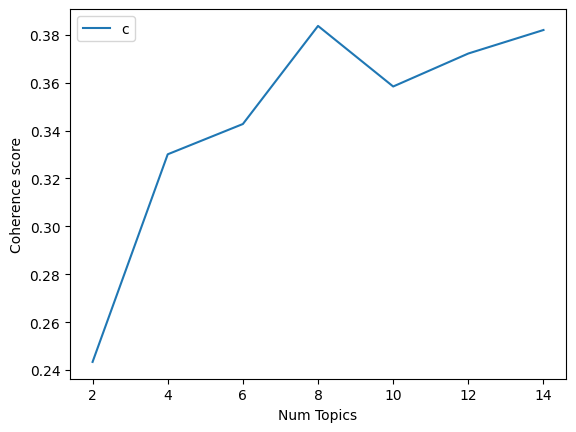

In [87]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2434
Num Topics = 4  has Coherence Value of 0.3301
Num Topics = 6  has Coherence Value of 0.3427
Num Topics = 8  has Coherence Value of 0.3837
Num Topics = 10  has Coherence Value of 0.3584
Num Topics = 12  has Coherence Value of 0.3722
Num Topics = 14  has Coherence Value of 0.382


In [93]:
optimal_model = model_list[4]

In [96]:
archivo='./Optimal'

In [97]:
optimal_model.save(archivo)

In [98]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [99]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word)
vis

C:\Users\Spun\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.097536  0.199580       1        1  17.358315
7      0.059199  0.085056       2        1  14.757095
6      0.100984  0.045728       3        1  14.365526
4     -0.334544 -0.016739       4        1  12.460007
5     -0.113701  0.163536       5        1  10.280466
8      0.112373 -0.127100       6        1   9.838245
3      0.061179 -0.050502       7        1   6.996719
9      0.046343 -0.033912       8        1   5.295270
0     -0.031101 -0.099867       9        1   4.930350
2      0.001733 -0.165780      10        1   3.718008, topic_info=          Term        Freq       Total Category  logprob  loglift
81      música  928.000000  928.000000  Default  30.0000  30.0000
4191     banda  410.000000  410.000000  Default  29.0000  29.0000
9338    actriz  286.000000  286.000000  Default  28.0000  28.0000
635      casos  556.000000  556.000000  Default  27.0000  27.0000
864   artistas  302.000000  302.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
688     hombre   22.043301   91.136251  Topic10  -5.6104   1.8726
1022     hecho   24.093141  297.678702  Topic10  -5.5215   0.7779
366   proyecto   24.286403  434.880876  Topic10  -5.5135   0.4068
177      parte   24.220136  676.559352  Topic10  -5.5163  -0.0379
244      valor   19.922354  121.242957  Topic10  -5.7116   1.4860

[562 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
860       7  0.960669                      $
860       9  0.035024                      $
1929      3  0.971953                   2015
1930      3  0.989903                   2018
824       8  0.964283  Deportes Puerto Montt
...     ...       ...                    ...
203       3  0.496216                   zona
203       6  0.244349                   zona
203       9  0.101499                   zona
4581      4  0.915477                  época
4581      7  0.077583                  época

[1001 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 8, 7, 5, 6, 9, 4, 10, 1, 3])

In [101]:
def format_topics_documents(ldamodel=None, corpus=df, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

C:\Users\Spun\AppData\Local\Temp\ipykernel_4584\4269230382.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.5379,"casos, personas, días, semana, pandemia, horas...",Un recorrido por los locales en el Parque La ...
1,1,0,0.4919,"actriz, compañeros, programa, podcast, Pese, t...",Exhaustiva revisión de encomiendas y allanami...
2,2,9,0.5294,"artista, trabajo, región, desarrollo, proyecto...",El Programa Territorial Integrado Ruta de los...
3,3,7,0.5424,"presidente, exponentes, ministro, país, proyec...",La comisión de Educación del Senado determinó...
4,4,3,0.4223,"$, datos, trabajos, estudio, trabajo, mercado,...",Ello porque existe la posibilidad que la Cámar...
5,5,6,0.3887,"carga, millones, sector, acuerdo, comuna, zona...",Por unanimidad el Concejo municipal de Castro ...
6,6,8,0.7029,"investigación, cámaras, hermano, años, persona...",Tras catorce años desde su anuncio y dos desd...
7,7,9,0.3499,"artista, trabajo, región, desarrollo, proyecto...",En la cita protocolar estuvieron presentes el ...
8,8,9,0.5079,"artista, trabajo, región, desarrollo, proyecto...",1.400 millones de pesos anuales destinará el M...
9,9,5,0.3640,"banda, música, años, artistas, idea, tema, dis...",Desde las 9 de la mañana de este lunes comenzó...


In [108]:
media_outlet = df.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,1,0.5379,"casos, personas, días, semana, pandemia, horas...",Un recorrido por los locales en el Parque La ...,radiosago
1,1,0,0.4919,"actriz, compañeros, programa, podcast, Pese, t...",Exhaustiva revisión de encomiendas y allanami...,radiosago
2,2,9,0.5294,"artista, trabajo, región, desarrollo, proyecto...",El Programa Territorial Integrado Ruta de los...,radiosago
3,3,7,0.5424,"presidente, exponentes, ministro, país, proyec...",La comisión de Educación del Senado determinó...,radiosago
4,4,3,0.4223,"$, datos, trabajos, estudio, trabajo, mercado,...",Ello porque existe la posibilidad que la Cámar...,radiosago
...,...,...,...,...,...,...
1497,1497,3,0.5498,"$, datos, trabajos, estudio, trabajo, mercado,...",Las últimas cifras de empleo en Chile son alen...,laestrelladechiloe
1498,1498,1,0.7229,"casos, personas, días, semana, pandemia, horas...",Más de 1.400 casos de Linfoma no Hodgkin se di...,laestrelladechiloe
1499,1499,4,0.6283,"música, tiempo, serie, momento, mundo, product...","Justo antes de la pandemia, Benjamín Vicuña vi...",laestrelladechiloe
1500,1500,4,0.5698,"música, tiempo, serie, momento, mundo, product...","Con 24 años, Esteban Cisterna, mejor conocido ...",laestrelladechiloe


In [110]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=82ef4fe72a22d63c47b2ba859e28ec49ae1ec84391a81f8af992649a92560970
  Stored in directory: c:\users\spun\appdata\local\pip\cache\wheels\63\e8\ec\75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [111]:
from pandasql import sqldf 

In [112]:
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,4,280
1,1,256
2,7,201
3,6,168
4,8,124
5,5,116
6,3,106
7,0,95
8,9,91
9,2,65


## Topico 0

In [124]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,37,0,0.9765,"actriz, compañeros, programa, podcast, Pese, trabajo, manera, caminos, duelo, idea","Desde la Corporación Nacional Forestal, Conaf, hicieron un llamado a cuidar la biodiversidad de los distintos parques y reservas nacionales, además de monumentos naturales que conforman las 12 áreas silvestres protegidas de la región de Los Lagos. En la Provincia de Osorno se encuentra el Parque Nacional Puyehue; en la Provincia de Llanquihue, los parques nacionales Vicente Pérez Rosales, Alerce Andino y Hornopirén, junto a la Reserva Nacional Llanquihue y Monumento Natural Lahuen Ñadi; en la Provincia de Chiloé, el Parque Nacional Chiloé y Monumento Natural Islotes de Puñihuil; y en la Provincia de Palena, los parques nacionales Pumalín Douglas Tompkins, Corcovado, y las reservas nacionales Futaleufú y Lago Palena. “Invitamos a los visitantes a descubrir y disfrutar de las áreas silvestres protegidas, respetando el espacio natural al cual se está ingresando, hábitat de miles de especies en nuestra región”, es el llamado del director regional de Conaf Los Lagos, Jorge Aichele, cuan...",radiosago


## Topico 1

In [125]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=1 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,36,1,0.9826,"casos, personas, días, semana, pandemia, horas, región, contagios, pacientes, caso","Lista y coordinada se encuentra la red asistencial del Servicio de Salud Chiloé para enfrentar la demanda de las fiestas patrias. Así lo aseguró su director, José Cárdenas Burce, quien explicó que se han realizado las programaciones para contar con el recurso humano necesario que permita cubrir los turnos, contar con los insumos y la movilización para los traslados. El plan de contingencia busca brindar respuesta eficaz y oportuna a las emergencias de salud que pudieran producirse durante estas festividades, entendiendo que durante las celebraciones aumentan las consultas de usuarios por accidentes y enfermedades asociadas al consumo de alimentos y bebidas, sumado a la pandemia por Covid-19. “La red se encuentra preparada organizando los turnos que permiten contar con la dotación necesaria para dar cobertura a la demanda, revisando también la disponibilidad de camas y el buen funcionamiento de los servicios de urgencia presentes en la provincia, además de la verificar el funcionam...",radiosago


## Topico 2

In [126]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=2 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,304,2,0.7409,"respeto, pieza, mezcla, mundo, vida, democracia, país, valores, niños, porcentaje","El arzobispo de Santiago, Celestino Aós, lideró ayer el Te Deum Ecuménico por Fiestas Patrias, donde agradeció el trabajo de los convencionales constituyentes, en particular a quienes ""buscan respetar y proteger los valores no negociables"", como la vida humana desde la concepción, y que el matrimonio es entre un hombre y una mujer. Sobre esto último, el Presidente Sebastián Piñera respondió que ""una cosa es el mundo de la religión (...) y otra cosa es el mundo laico"". La máxima autoridad de la Iglesia en Chile ayer en su homilía agradeció a Dios por quienes trabajan en el servicio público, junto a los miembros de la Convención Constitucional, sobre todo por ""aquellos que buscan respetar y proteger los valores no negociables: el respeto y la defensa de la vida humana desde su concepción hasta su fin natural, la familia fundada en el matrimonio entre hombre y mujer, la libertad de los padres para elegir el modelo y el establecimiento de educación de los hijos, la promoción del bien c...",elaustral


## Topico 3

In [127]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=3 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,73,3,0.9329,"$, datos, trabajos, estudio, trabajo, mercado, obra, millones, recuperación, país","El llamado contempla también otros trabajos indispensables para el combate de incendios forestales. El llamado contempla también otros trabajos indispensables para el combate de incendios forestales. La Corporación Nacional Forestal CONAF Región de Los Lagos, abrió postulación para brigadistas y otros puestos de trabajo, de cara a la temporada de incendios forestales 2021-2022. Entre los requisitos generales se solicita ser mayor de 18 años, salud física compatible con el cargo al que postula y encontrarse habilitado para prestar servicios en el Estado. Los cargos a postular son brigadista forestal para las provincias de Osorno, Llanquihue, Chiloé y Palena; brigadista operador/a de motobomba para las provincias de Osorno, Llanquihue, Chiloé y Palena; brigadista operador/a de motosierra, para las provincias de Osorno, Llanquihue, Chiloé y Palena; jefe/a de cuadrilla para las provincias de Osorno, Llanquihue, Chiloé y Palena; jefe/a de brigada, para las provincias de Osorno, Llanquih...",elheraldoaustral


## Topico 4

In [128]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=4 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,404,4,0.8748,"música, tiempo, serie, momento, mundo, productor, onda, género, Young Cister, año","En estas fechas generalmente se centra la atención en lo que se piensa tirar a la parrilla, ya sean carnes, verduras o ambas. Pero mientras se hace el asado, los comensales generalmente toman y pican algo para calmar el hambre. Es entonces cuando las salsas -que muchas veces también terminan acompañando al asado- tienen la oportunidad de brillar. Tomando en cuenta que los festejos que comienzan mañana son las fiestas patrias, expertos en cocina chilena compartieron sus recetas de las más ricas salsas típicas de este país, aunque con sus toques personales y algunos consejos para saber con qué acompañarlas y así disfrutarlas al máximo. Ingredientes -1 taza de mayonesa -1/2 cdta. de sal -2 pizcas de pimienta -1 tomate -1 cda. de cebollín -1 cda. de perejil -1 cda. de pimentón rojo -2 dientes de ajo Pelar el tomate, retirar las pepas y cortar en pequeños cubos, al igual que el pimentón. Reservar. Luego, cortar el cebollín en cubitos pequeños, desojar el perejil y cortar finamente. Rese...",laestrelladechiloe


## Topico 5

In [135]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=5 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,283,5,0.879,"banda, música, años, artistas, idea, tema, disposición, año, lugares, proyecto","La tenista nacional Alexa Guarachi quedó a solo un paso de entrar al top ten del ránking mundial de dobles femenino. Pese a no haber jugado durante la semana pasada, la chilena ascendió gracias a la caída de la checa Barbora Strycova, ex número uno del mundo, quien de a poco abandona los puestos superiores del ránking tras haber anunciado su retiro en mayo.",elaustral


## Topico 6

In [130]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=6 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,71,6,0.9596,"carga, millones, sector, acuerdo, comuna, zona, parte, vecinos, municipio, año","En este evento gratuito, que requiere inscripción previa en cisvo.uach@gmail.com expondrá el Dr. Francisco Salazar, líder del Grupo de Especialidad Impacto Ambiental del Instituto de Investigaciones Agropecuarias (INIA). En este evento gratuito, que requiere inscripción previa en cisvo.uach@gmail.com expondrá el Dr. Francisco Salazar, líder del Grupo de Especialidad Impacto Ambiental del Instituto de Investigaciones Agropecuarias (INIA). “Investigación y Desarrollo en Pérdidas de Nitrógeno en Suelos Volcánicos del Sur de Chile”, es la charla que ofrecerá el Dr. Francisco Salazar, investigador de INIA Remehue, como parte del ciclo de seminarios online organizado por el proyecto REDES 180168. La actividad se efectuará el 23 de septiembre a las 11:30 horas de manera gratuita previa inscripción en cisvo.uach@gmail.com El Dr. Francisco Salazar es líder del Grupo de Especialidad Impacto Ambiental del Instituto de Investigaciones Agropecuarias (INIA), que está a la vanguardia en materia d...",elheraldoaustral


## Topico 7

In [131]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=7 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,287,7,0.9216,"presidente, exponentes, ministro, país, proyecto, parte, ley, crisis, acuerdo, abogado","El Departamento de Estado de EE.UU. afirmó ayer que las elecciones rusas para renovar la Duma o Cámara de Diputados, en las que el partido del Kremlin -Rusia Unida- renovó la mayoría constitucional, no se celebraron bajo ""unas condiciones justas y libres"". Así se expresó en un comunicado Ned Price, portavoz del Departamento de Estado, quien criticó ""la marginación de figuras políticas independientes"" debido a las leyes electorales. ""El uso por parte del Gobierno de Rusia de leyes sobre 'organizaciones extremistas', 'agentes extranjeros' y 'organizaciones indeseables' restringió gravemente el pluralismo e impidió que el pueblo ruso ejerciese sus derechos civiles y políticos"", agregó Price. Lamentó, además, que el Kremlin no permitiera la Organización para la Cooperación y la Seguridad en Europea (OSCE) enviar su misión electoral para comprobar el desarrollo de la jornada electoral, ""limitando así la transparencia esencial para unas elecciones justas"". El partido del Kremlin, Rusia U...",elaustral


## Topico 8

In [132]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=8 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,87,8,0.967,"investigación, cámaras, hermano, años, personas, víctima, mujer, imputado, ataque, fiscal","El Tribunal Oral en lo Penal (TOP) de Puerto Montt decidió dictar sentencia contra 8 personas por su participación en el homicidio de Armin Antonio Gómez y por tráfico de drogas. Según informó Mega, la principal condena recayó sobre Flavio Andrés Salinas Millanao, cuya sentencia fue de 18 años de presidio. La sentencia se había demorado más de 2 años debido a que era muy poca la información disponible sobre el delito ocurrido en la madrugada del 24 de abril del 2019 en el camino costero de Calbuco. Al respecto, el fiscal jefe de Puerto Montt, Marcelo Maldonado, señaló que ""es un fallo importante porque la investigación nace prácticamente con poca información de los hechos, sin testigos presenciales, sin cámaras de seguridad, en una zona rural, donde era de noche, no había personas transitando y sin sospechosos"". Sin embargo, el panorama cambió gracias a la evidencia recopilada a partir de un celular que fue encontrado por la PDI en el lugar de los hechos, y que usaba el imputado el...",elrepuertero


## Topico 9

In [133]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=9 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,83,9,0.917,"artista, trabajo, región, desarrollo, proyecto, alza, empresas, trabajadores, territorio, turismo","Son 2.075 becas disponibles concentradas en dos líneas de trabajo, turismo y digitalización. Iinteresados en postular pueden visitar el siguiente link: www.becascapitalhumano.cl Son 2.075 becas disponibles concentradas en dos líneas de trabajo, turismo y digitalización. Iinteresados en postular pueden visitar el siguiente link: www.becascapitalhumano.cl Chile cuenta con importantes ventajas como su apertura comercial, infraestructura tecnológica y capacidades innovadoras en alza para generar productos y servicios digitales escalables a nivel global. Pero hay un desafío pendiente, la disponibilidad de talento con las habilidades necesarias para apalancar este desafío. Es por esto que Corfo amplió para este año su cobertura de cursos con 2.075 becas disponibles, concentradas en dos líneas de trabajo, turismo y digitalización. Al respecto, Rodrigo Carrasco señaló que “hoy la región de Los Lagos es reconocida como un territorio apropiado en Chile para el desarrollo del turismo de aven...",elheraldoaustral


# Nombrar Topicos

4 -> expertos en cocina chilena compartieron sus recetas de las más ricas salsas típicas de este país

1 -> recurso humano necesario que permita cubrir los turnos respecto con la salud en fiestas patrias

7 -> las elecciones rusas para renovar la Duma o Cámara de Diputados no se celebraron bajo "unas condiciones justas y libres"

6 -> Charla "Investigación y Desarrollo en Pérdidas de Nitrógeno en Suelos Volcánicos del Sur de Chile”

8 -> Homicidio de Armin Antonio Gómez y trafico de drogas

5 -> Alexa Guarachi quedó a solo un paso de entrar al top ten del ránking mundial de dobles femenino7

3 -> Trabajos para combate a incendios forestales

0 -> cuidar la biodiversidad de los distintos parques y reservas nacionales

9 -> Becas para turismo y digitalizacion

2 -> Te Deum Ecuménico




# Topicos importantes por comuna

In [144]:
comunas = [
    'Ancud', 
    'Castro',
    'Chonchi',
    'Curaco de Vélez',
    'Dalcahue',
    'Puqueldón',
    'Queilén',
    'Quemchi',
    'Quellón',
    'Quinchao',
    'Calbuco',
    'Cochamó',
    'Fresia',
    'Frutillar',
    'Llanquihue',
    'Los Muermos',
    'Maullín',
    'Puerto Montt',
    'Puerto Varas',   
    'Osorno',
    'Puerto Octay',
    'Purranque',
    'Puyehue',
    'Río Negro',
    'San Juan de la Costa',
    'San Pablo',
    'Chaitén',
    'Futaleufú',
    'Hualaihué',
    'Palena'
]


## Topico 0

In [224]:
class comunasLosLagos:
    def __init__(self,comuna,topico):
        self.comuna = comuna
        self.topico = topico
topicosPorComuna = []

In [225]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Biodiversidad parques")
        topicosPorComuna.append(topico)

## Topico 1

In [226]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=1 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Recursos humanos en la salud fiestas patrias")
        topicosPorComuna.append(topico)

## Topico 2

In [227]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=2 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Te Deum Ecuménico")
        topicosPorComuna.append(topico)

## Topico 3

In [228]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=3 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Trabajos para combatir incendios forestales")
        topicosPorComuna.append(topico)

## Topico 4

In [229]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=4 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Recetas de salsas")
        topicosPorComuna.append(topico)

## Topico 5

In [230]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=5 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Alexa Guarachi quedó a solo un paso de entrar al top ten del ránking mundial de dobles femenino")
        topicosPorComuna.append(topico)

## Topico 6

In [231]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=6 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Investigación y Desarrollo en Pérdidas de Nitrógeno en Suelos Volcánicos del Sur de Chile" )
        topicosPorComuna.append(topico)

## Topico 7

In [232]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=7 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "elecciones rusas para renovar la Duma o Cámara de Diputados no se celebraron bajo unas condiciones justas y libres" )
        topicosPorComuna.append(topico)

## Topico 8

In [233]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=8 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Homicidio de Armin Antonio Gómez y trafico de drogas" )
        topicosPorComuna.append(topico)

## Topico 9

In [234]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=9 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
for comuna in comunas:
    esta = comuna in result.Text[0]
    if(esta == True):
        topico = comunasLosLagos(comuna, "Becas para turismo y digitalizacion" )
        topicosPorComuna.append(topico)

In [238]:
for comuna in topicosPorComuna :
    print(comuna.comuna, ", Topico: ", comuna.topico)

Llanquihue , Topico:  Biodiversidad parques
Osorno , Topico:  Biodiversidad parques
Puyehue , Topico:  Biodiversidad parques
Futaleufú , Topico:  Biodiversidad parques
Palena , Topico:  Biodiversidad parques
Ancud , Topico:  Recursos humanos en la salud fiestas patrias
Castro , Topico:  Recursos humanos en la salud fiestas patrias
Quellón , Topico:  Recursos humanos en la salud fiestas patrias
Llanquihue , Topico:  Trabajos para combatir incendios forestales
Puerto Montt , Topico:  Trabajos para combatir incendios forestales
Osorno , Topico:  Trabajos para combatir incendios forestales
Palena , Topico:  Trabajos para combatir incendios forestales
Calbuco , Topico:  Homicidio de Armin Antonio Gómez y trafico de drogas
Puerto Montt , Topico:  Homicidio de Armin Antonio Gómez y trafico de drogas
Puerto Varas , Topico:  Becas para turismo y digitalizacion
